In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from PIL import Image

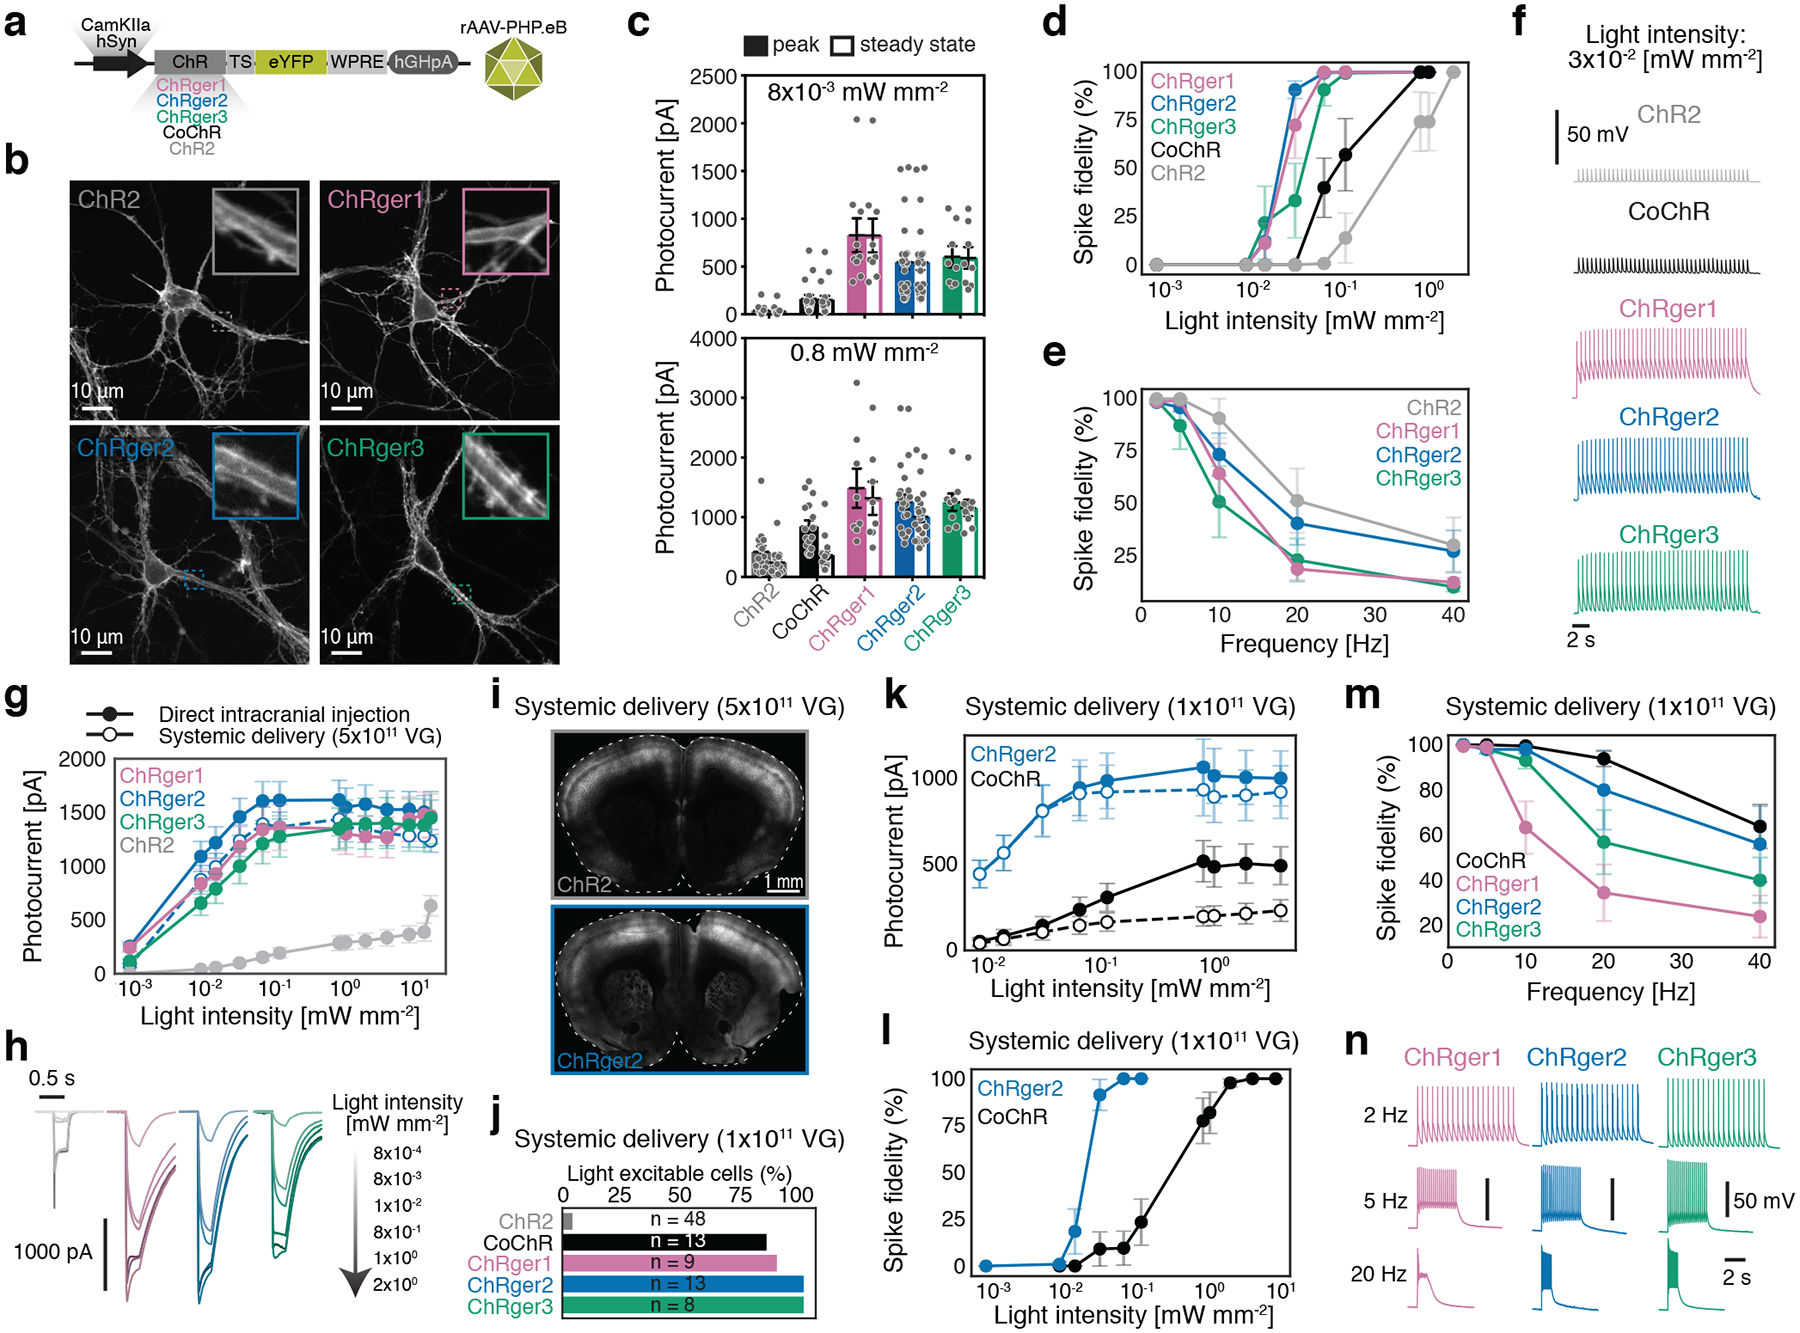

In [16]:
fig2_path = '/Users/loyalshababo/dev/plotreader/sandbox/storage/data_images_page_screenshots/1e8b6719-3176-4666-b741-4e06236dec79-img_p23_1.png'
fig2_img = Image.open(fig2_path)
fig2_img

In [5]:
from plotreader.utils.base import BasicAnthropicLLM


claude_mm = BasicAnthropicLLM(model='claude-3-5-sonnet-20240620')

In [37]:
from pydantic import BaseModel, Field
from llama_index.core.output_parsers.pydantic import PydanticOutputParser
from llama_index.core.prompts import PromptTemplate
import plotreader

class BoundingBox(BaseModel):
    left_x: float = Field(..., description="The x-coordinate of the left side of the bounding box in the range 0.0 to 1.0")
    upper_y: float = Field(..., description="The y-coordinate of the top side of the bounding box in the range 0.0 to 1.0")
    right_x: float = Field(..., description="The x-coordinate of the right side of the bounding box in the range 0.0 to 1.0")
    lower_y: float = Field(..., description="The y-coordinate of the bottom side of the bounding box")


output_parser = PydanticOutputParser(output_cls=BoundingBox)

In [38]:
prompt_base = "Provide a bounding box for panel d in the provided figure. Be liberal with padding, we'd rather have extra that lose part of the panel."
prompt = PromptTemplate(prompt_base, output_parser=output_parser).format(llm=plotreader._MM_LLM)

In [39]:


response = claude_mm.message(
    prompt,
    images = [fig2_img]
)


BoundingBox(left_x=0.51, upper_y=0.0, right_x=0.75, lower_y=0.33)

In [62]:
import numpy as np
padding = 0.1
bbox.left_x = np.max([0, bbox.left_x - padding])
bbox.upper_y = np.max([0, bbox.upper_y - padding])
bbox.right_x = np.min([1, bbox.right_x + padding])
bbox.lower_y = np.min([1, bbox.lower_y + padding])
bbox
# use pillow to crop the image

BoundingBox(left_x=0.41000000000000003, upper_y=0.0, right_x=0.85, lower_y=0.43000000000000005)

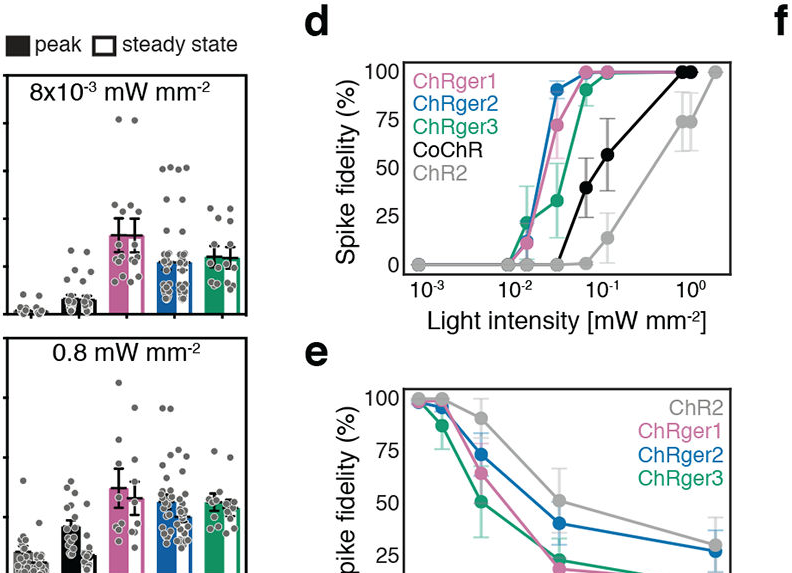

In [63]:
# use pillow to crop the image
fig_size = fig2_img.size
bbox_px_vals = [bbox.left_x*fig_size[0], bbox.upper_y*fig_size[1], bbox.right_x*fig_size[0], bbox.lower_y*fig_size[1]]

# Crop the image using the extracted coordinates
cropped_img = fig2_img.crop(bbox_px_vals)
cropped_img

In [50]:
fig_size

(1800, 1333)